In [1]:
from TransformingCity import TransformingCity, LandUseViewer, PopulationViewer

import numpy as np
import matplotlib.pyplot as plt
import thinkplot
import scipy

%matplotlib inline
from matplotlib import rc
rc('animation', html='html5')

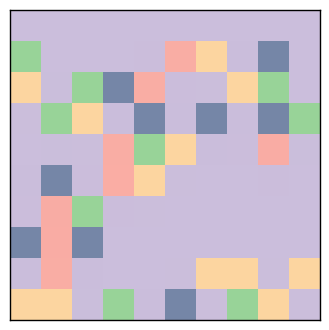

In [2]:
city = TransformingCity(10)
city.array = city.landuse # default array is landuse
viewer = LandUseViewer(city)
anim = viewer.animate()

In [3]:
anim

In [4]:
print(city.array)

[[1 1 1 1 1 1 1 1 1 1]
 [6 1 1 1 1 3 2 1 5 1]
 [2 1 6 5 3 1 1 2 6 1]
 [1 6 2 1 5 1 5 1 5 6]
 [1 1 1 3 6 2 1 1 3 1]
 [1 5 1 3 2 1 1 1 1 1]
 [1 3 6 1 1 1 1 1 1 1]
 [5 3 5 1 1 1 1 1 1 1]
 [1 3 1 1 1 1 2 2 1 2]
 [2 2 1 6 1 5 1 6 2 1]]


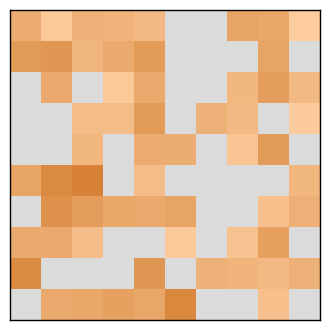

In [5]:
city = TransformingCity(10)
city.step()
city.array = city.pop_count # default array is landuse
viewer = PopulationViewer(city)
anim = viewer.animate()

In [6]:
anim

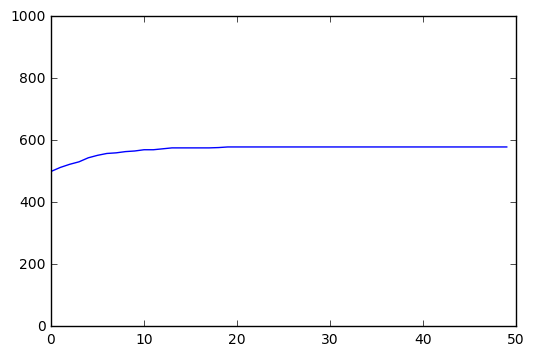

In [7]:
#The smaller the city, the more agents get displaced, because creative density is higher.
#the whole time.
city = TransformingCity(7)
for i in range(50):
    city.step()
    
plt.plot(city.displaced_history)
plt.ylim([0, 1000])
plt.show()

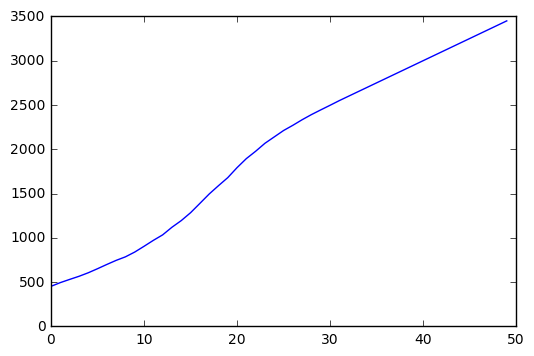

In [8]:
#A smaller city with new agents moving in means that...
#more agents get displaced, because creative density gets EVEN higher.
city = TransformingCity(7)
steps = 50
n_to_add_per_step = 50
for i in range(steps):
    city.step()
    city.add_agents(n_to_add_per_step)
    
plt.plot(city.displaced_history)
plt.ylim([0, 1000 + steps*n_to_add_per_step])
plt.show()

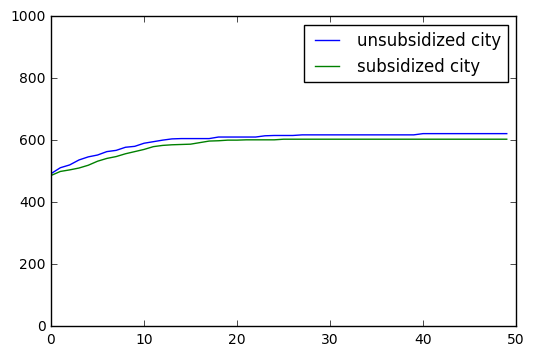

In [9]:
#The smaller the city, the more agents get displaced, because creative density is higher.
#the whole time.
city = TransformingCity(7)
sub_city = TransformingCity(7, p_subsidized = .1)


for i in range(50):
    city.step()
    sub_city.step()
    
plt.plot(city.displaced_history, label='unsubsidized city')
plt.plot(sub_city.displaced_history, label='subsidized city')
plt.legend(loc='best')
plt.ylim([0, 1000])
plt.show()

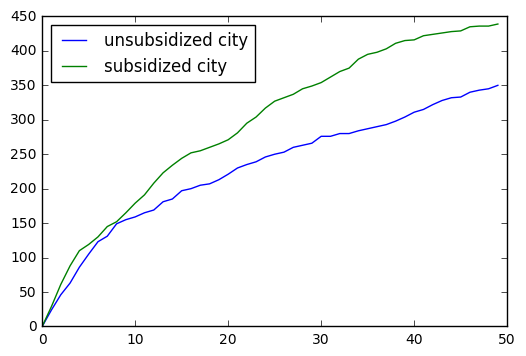

In [10]:
city = TransformingCity(7)
sub_city = TransformingCity(7, p_subsidized = .1)


for i in range(50):
    city.step()
    sub_city.step()
    
unsubnormalized = [x - city.displaced_history[0] for x in city.displaced_history]
subnormalized = [x - sub_city.displaced_history[0] for x in sub_city.displaced_history]
plt.plot(unsubnormalized, label='unsubsidized city')
plt.plot(subnormalized, label='subsidized city')
plt.legend(loc='best')
# plt.ylim([0, 1000])
plt.show()

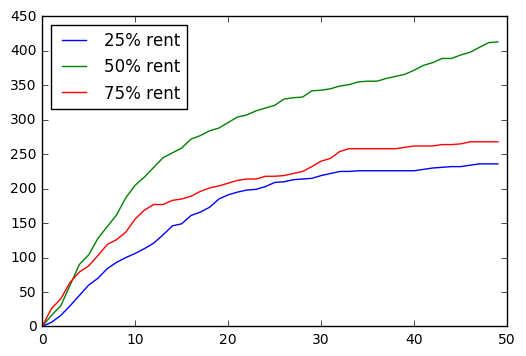

In [11]:
np.random.seed(40)
city_quarter = TransformingCity(7, p_subsidized = .5, sub_housing_rate = 0.25)
city_half = TransformingCity(7, p_subsidized = .5, sub_housing_rate = 0.5)
city_threequarter = TransformingCity(7, p_subsidized = .5, sub_housing_rate = 0.75)

for i in range(50):
    city_quarter.step()
    city_half.step()
    city_threequarter.step()
    
quarter = [x - city_quarter.displaced_history[0] for x in city_quarter.displaced_history]
half = [x - city_half.displaced_history[0] for x in city_half.displaced_history]
threequarter = [x - city_threequarter.displaced_history[0] for x in city_threequarter.displaced_history]

plt.plot(quarter, label='25% rent')
plt.plot(half, label='50% rent')
plt.plot(threequarter, label='75% rent')
plt.legend(loc='best')
plt.show()

In [12]:

def get_slopes(cities):


    for i in range(20):
        for city in cities:
            city.step()

    i = 0
    slopes = []
    for city in cities:
        slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(range(len(city.displaced_history)), city.displaced_history)
        slopes.append(slope)
        #print(slopes[i-1])
        i += 1
        
    return tuple(slopes)
    

In [13]:
#linear regression of a bunch of runs.
slopes1 = []
slopes2 = []
for i in range(100):
    city1 = TransformingCity(7)
    sub_city = TransformingCity(7, p_subsidized = .1)
    cities = [city1, sub_city]
    slope1, slope2 = get_slopes(cities)
    slopes1.append(slope1)
    slopes2.append(slope2)

print(np.mean(slopes1))
print(np.mean(slopes2))

KeyboardInterrupt: 

In [14]:
slopes25 = []
slopes50 = []
slopes75 = []

for i in range(100):
    city_quarter = TransformingCity(7, p_subsidized = .5, sub_housing_rate = 0.25)
    city_half = TransformingCity(7, p_subsidized = .5, sub_housing_rate = 0.5)
    city_threequarter = TransformingCity(7, p_subsidized = .5, sub_housing_rate = 0.75)
    
    cities = [city_quarter, city_half, city_threequarter]
    s25, s50, s75 = get_slopes(cities)
    slopes25.append(s25)
    slopes50.append(s50)
    slopes75.append(s75)

print(np.mean(slopes25))
print(np.mean(slopes50))
print(np.mean(slopes75))


KeyboardInterrupt: 